In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv('data.csv')

In [36]:
df # this returns the entire dataframe

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [37]:
# below the table we can see the structure of the dataframe(8523 rows x 13 columns)
# we can also find this structure using shape command

In [14]:
df.shape #this shows us the structure of the dataframe in the format of rows and columns

(8523, 13)

In [9]:
df.head() # this command is used to return the top 5 rows of the dataframe

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [10]:
# by default the value is taken as 5, but can be changed by adding that value as a parameter
df.head(7)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.7,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8.8


In [ ]:
df.tail() #this command is used to return the bottom  5 rows of the dataframe,similarly a paramter can also be passed here. 

In [15]:
df.tail().shape # similary it can also be applied to the head and tail values

(5, 13)

In [12]:
df.columns # this command is used to display all the columns in the dataframe

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'y'],
      dtype='object')

In [13]:
df.dtypes #this command is used to display all the columns in the dataframe along with their datatypes

X1      object
X2     float64
X3      object
X4     float64
X5      object
X6     float64
X7      object
X8       int64
X9      object
X10     object
X11     object
X12    float64
y      float64
dtype: object

In [16]:
df.describe() #this commnad describes the table correlation

,X2,X4,X6,X8,X12,y
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [33]:
#this command will only describe the numerical cols
# here we can observe that all the values of count row are same except for the x2 column
# this implies that there are missing values in that column
# the total no.of missing values is directly proportional to the no.of reduced values in that column compared to other cols.
# here we can see that the range of X12 is large, which implies that there might be outliers in X12

In [34]:
df.X1.value_counts() # we use this command to find the categories in that column along with their count

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: X1, Length: 1559, dtype: int64

In [ ]:
# we use this commnad on every categorical column in the table to find its categories and their count

In [27]:
df.X3.value_counts()

Low Fat    5517
Regular    3006
Name: X3, dtype: int64

In [28]:
df.X5.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: X5, dtype: int64

In [29]:
df.X7.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: X7, dtype: int64

In [30]:
df.X9.value_counts()

Medium    2793
Small     2388
High       932
Name: X9, dtype: int64

In [31]:
df.X10.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: X10, dtype: int64

In [32]:
df.X11.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: X11, dtype: int64

## Data visualization

In [ ]:
#univariate visusalization
# we use histogram to visualize continous numerical data
# whereas for categorical data we use pie chart

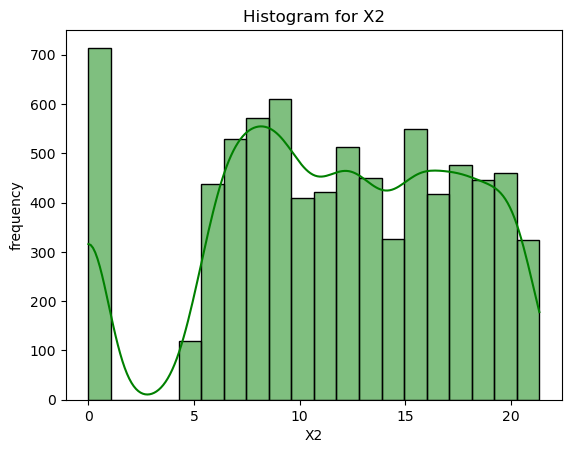

In [44]:
#univariate histogram
sns.histplot(df['X2'],bins=20,kde=True,color='green')
plt.xlabel('X2')
plt.ylabel('frequency')
plt.title('Histogram for X2')
plt.show()

In [45]:
# from the above graph we can observe that there are missing values/bins between 1 and 5,i.e.outliers exist in the data
# we can also see that rest of the graph is equally distributed

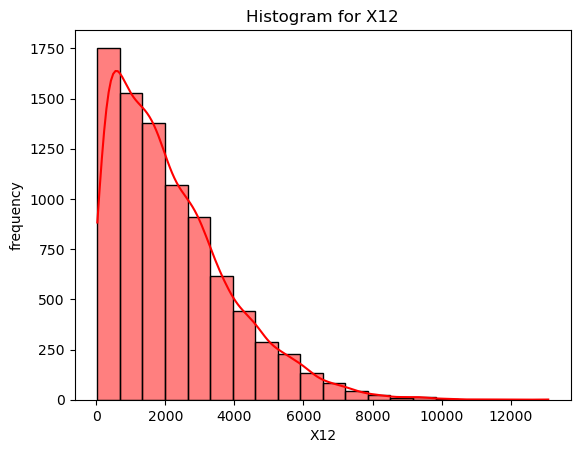

In [48]:
#univariate histogram
sns.histplot(df['X12'],bins=20,kde=True,color='red')
plt.xlabel('X12')
plt.ylabel('frequency')
plt.title('Histogram for X12')
plt.show()

In [47]:
# from the above graph we can observe that there are outliers in this data
# this graph is right skewed

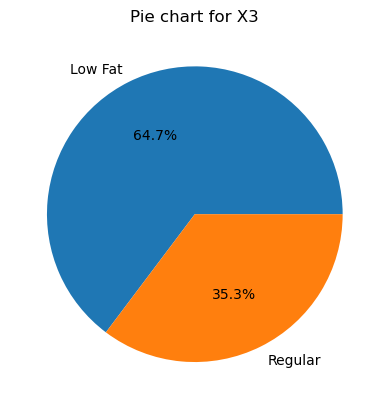

In [52]:
#univariate pie chart
a=[0.1,0]
df['X3'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=a)
plt.ylabel('')
plt.title('Pie chart for X3')
plt.show()

In [67]:
# from this pie chart we can interpret that the majority of items are of low fat

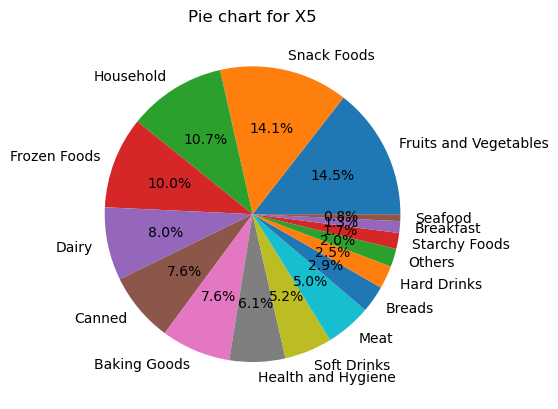

In [62]:
#univariate pie chart
df['X5'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Pie chart for X5')
plt.show()

In [68]:
# from this pie chart we can interpret that the majority of food type is Fruits and vegetables with 14.5%
# and least type of food is seafood with 0.8%

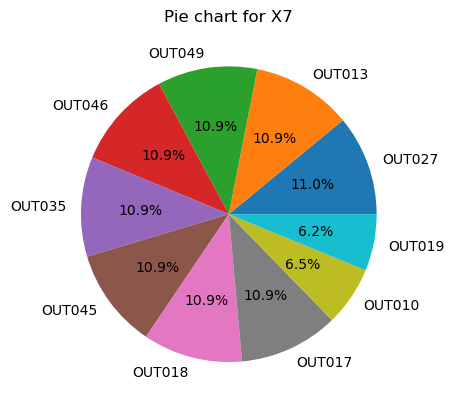

In [63]:
#univariate pie chart
a=[0.2,0,0,0,0,0,0,0,0,0]
df['X7'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Pie chart for X7')
plt.show()

In [69]:
# from this pie chart we can interpret that almost all categories have equal hold except the OUT019 and OUT010

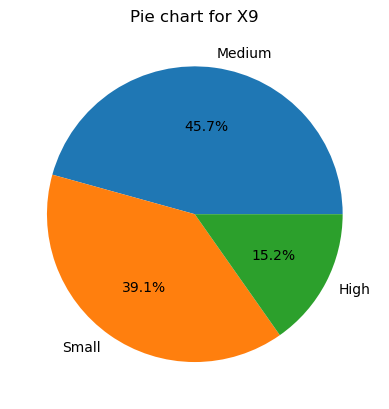

In [64]:
#univariate pie chart
df['X9'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Pie chart for X9')
plt.show()

In [70]:
# from the above pie chart we can see that majority of the categories is occupied by Medium category,i.e which might imply that
#the product which is medium size or the product which is consumed in a medium scale is more depending on the data
#as currently there is no proper column names to get the description of the data

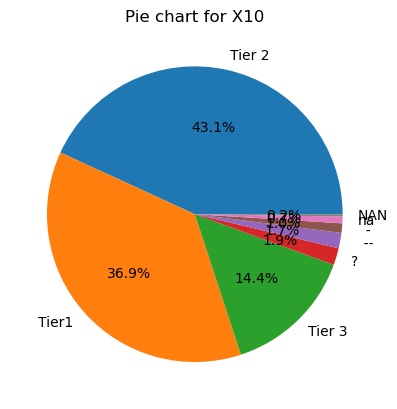

In [65]:
#univariate pie chart
df['X10'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Pie chart for X10')
plt.show()

In [71]:
# from the above graph we can interpret that tier 2  categorized food has majority of the graph in this data

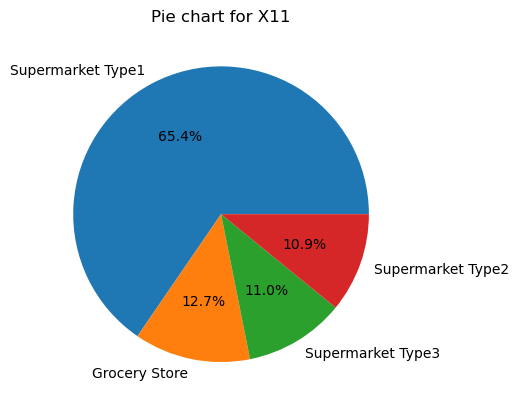

In [66]:
#univariate pie chart
df['X11'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Pie chart for X11')
plt.show()

In [72]:
# from the above pie chart it's clear that supermarket Type1 has the majority of data in it's category

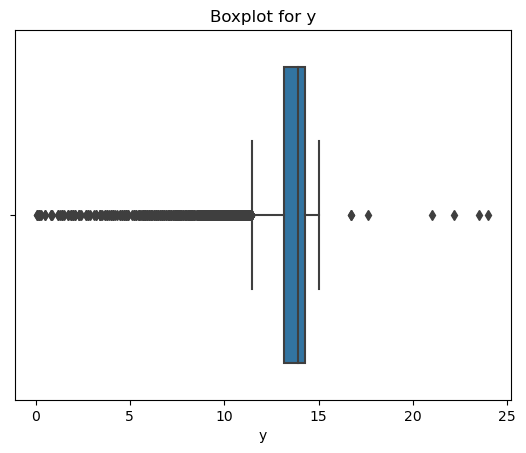

In [78]:
#univariate boxplot
sns.boxplot(x=df['y'])
plt.title('Boxplot for y')
plt.ylabel('')
plt.show()

In [79]:
# box plot chart is used to visualize the outliers in the data
#we use boxplot chart for numerical data

In [82]:
#bivariate visualization
# this type of visualization includes line chart and scatter plot
# for these charts we need two variables or columns

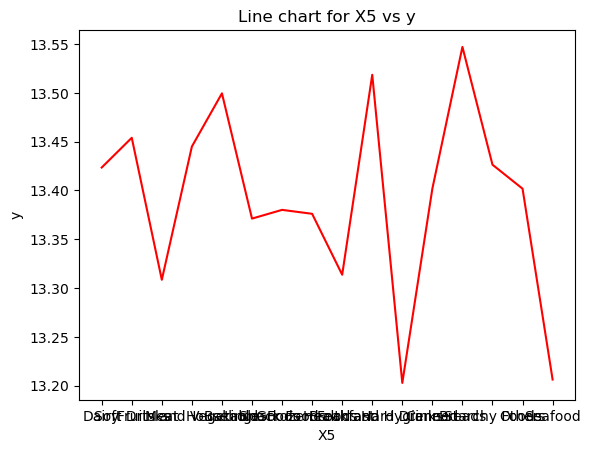

In [86]:
#bivariate line chart
sns.lineplot(x='X5',y='y',data=df,errorbar=None,color='red')
plt.xlabel('X5')
plt.ylabel('y')
plt.title('Line chart for X5 vs y')
plt.show()

In [89]:
#here we chose y as y axis as it is our target variable
# and we chose X5 because these are dependent values

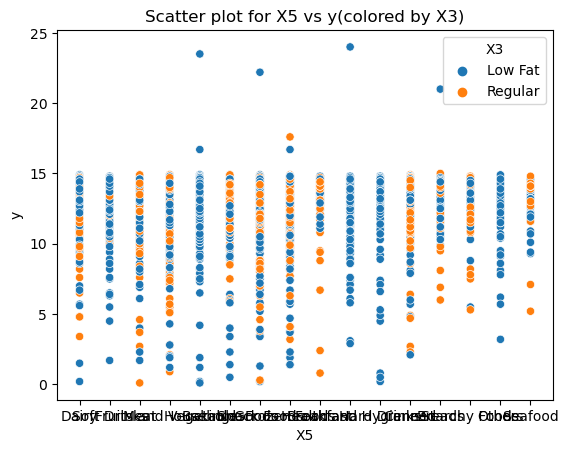

In [91]:
#trivariate scatterplot
sns.scatterplot(x='X5',y='y',hue='X3',data=df)
plt.xlabel('X5')
plt.ylabel('y')
plt.title("Scatter plot for X5 vs y(colored by X3)")
plt.show()

In [92]:
#here we chose y as y axis as it is our target variable
# and we chose X5 because these are dependent values
# and here hue is the category which divided them into different colors

## Data Preprocessing

In [93]:
#dropping columns
df=df.drop(columns=['X1','X7'])

In [94]:
# here we dropped the above columns as they don't have any effect on the data and the target column.

In [96]:
df.shape

(8523, 11)

In [104]:
#dropping the null value rows
df.dropna()
df.shape

(8523, 11)

In [105]:
df.describe()

,X2,X4,X6,X8,X12,y
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [110]:
df_num=df.select_dtypes(include='number')

In [112]:
df_num.shape

(8523, 6)

In [113]:
df_num.describe()

,X2,X4,X6,X8,X12,y
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [116]:
#outlier filter
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [117]:
lower_bound

X2       -5.450000
X4       -0.074404
X6      -43.975000
X8     1961.500000
X12   -2566.326100
y        11.425000
dtype: float64

In [118]:
df=df[~((df_num<lower_bound)|(df_num>upper_bound))]

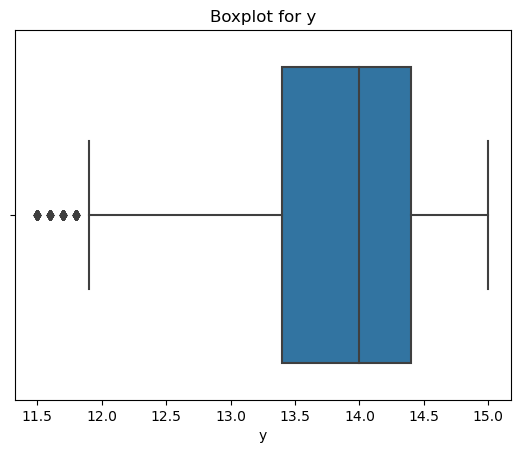

In [119]:
sns.boxplot(x=df['y'])
plt.title('Boxplot for y')
plt.ylabel('')
plt.show()

In [120]:
df_num=df.select_dtypes(include='number')

In [121]:
#outlier filter
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [122]:
df=df[~((df_num<lower_bound)|(df_num>upper_bound))]

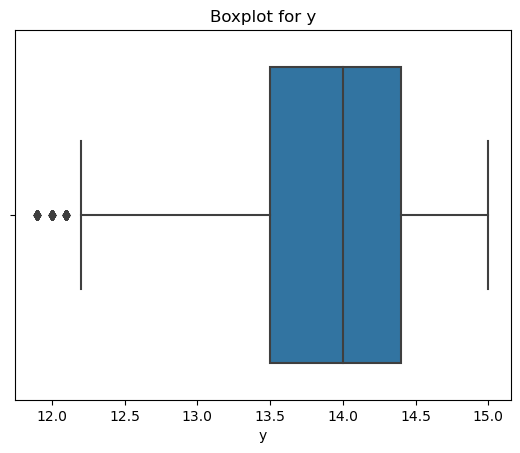

In [123]:
sns.boxplot(x=df['y'])
plt.title('Boxplot for y')
plt.ylabel('')
plt.show()

In [125]:
df_num=df.select_dtypes(include='number')

In [126]:
#outlier filter
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [127]:
df=df[~((df_num<lower_bound)|(df_num>upper_bound))]

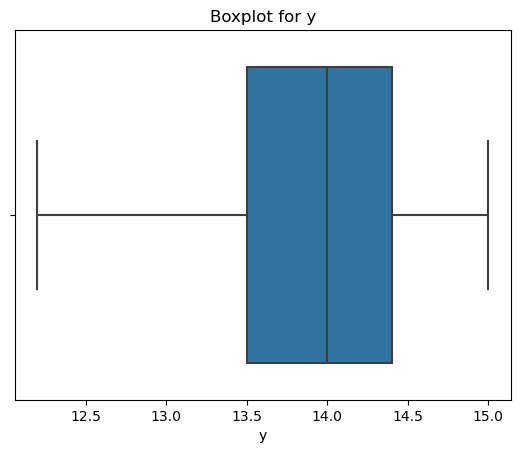

In [128]:
sns.boxplot(x=df['y'])
plt.title('Boxplot for y')
plt.ylabel('')
plt.show()

In [ ]:
# here there are no outliers